Hello! Welcome to a tutorial on python. The goals of the tutorial will be:
1) An application to using pre-defined python libraries and functions -
To draw images and display the output
2) Using classes and instantiation in python

Scenario A: 2D basic simulation of the ET1 shield 

Lets get started! 


On Jupyter notebook we can draw a canvas or surface representing the boundary region. One can then paste an image or shape on the canvas by specifying the coordinates.

As you can see in the requirements.txt file, the required libraries to be installed are mentioned. mybinder takes care of preparing the environment and installing the required libraries. 

In any python file, even though installed we need to import certain libraries. 

In [ ]:
import socket
from PIL import Image, ImageDraw
import ipywidgets as widgets
from IPython.display import display, clear_output
import math
import time

In [ ]:
canvas_width = 900
canvas_height = 500
canvas = Image.new("RGB", (canvas_width, canvas_height), "black")
draw = ImageDraw.Draw(canvas)
display(canvas)

Let us now draw a square shape with length 40 on the canvas 

In [ ]:
draw.rectangle([(0,0),(40, 40)], fill="blue")        
display(canvas)

We can draw the square shape on any part of the canvas if we specify the top left and top right coordinates in a tuple [(x0,y0), (x1, y1)].

a function can be written to receive input using ipywidgets of the top left coordinate and thus we can draw the square.

In [ ]:

# Create a FloatText widget for user input
input_widget = FloatText(description='Enter a value:')

# Create an Output widget to display the result
output_widget = Output()

# Function to handle the input change
def draw_square(change):
    user_input = input_widget.value   
    clear_output(wait=True)
    canvas_width = 900
    canvas_height = 500
    canvas = Image.new("RGB", (canvas_width, canvas_height), "black")
    draw = ImageDraw.Draw(canvas)
    display(canvas)
    with output_widget:
        output_widget.clear_output()
        draw.rectangle([(user_input,user_input),(user_input+40, user_input+40)], fill="blue")        
        display(canvas)

# Attach the function to the input widget's 'value' trait
input_widget.observe(draw_square, names='value')

# Display the widgets
VBox([input_widget, output_widget])

Classes:

A class is a blueprint or a template for creating objects. It defines a set of attributes (data members) and methods (functions) that the objects created from the class will have.

Thus we can create a square image, which has a default definition of the environment. Consider the case of the ET1 shield. If we want to control its movement in a room, we need to know the dimension of the room it is placed. We also need to know the objects starting location. We can also define what kind of movements the ET1 shield is capable of. In this jupyter notebook we consider four movements up, down, left and right.

Instances: An instance is an individual object created from a particular class. It represents a specific realization of the attributes and behaviors defined in the class. An instance has also characteristics of the ET1shield. The trick we will use here is to keep a track of the ET1shield's top left coordinate, so that we can move the ET1shield as we like at any time. 



In [ ]:
class Abstractcar:
    def __init__(self, x, y, image_width):
        self.image = image_width
        self.x = x
        self.y = y
        self.canvas_width = 900
        self.canvas_height = 500

    def draw_rectangle(self):
        canvas = Image.new("RGB", (self.canvas_width, self.canvas_height), "white")
        draw = ImageDraw.Draw(canvas)
        draw.rectangle([(self.x, self.y), (self.x + self.image, self.y + self.image)], fill="blue")        
        display(canvas)
        
    def move_right(self):
        clear_output(wait=True)
        self.x += 0.8
        self.draw_rectangle()
        
    def move_left(self):
        clear_output(wait=True)
        self.x -= 0.8
        self.draw_rectangle()
    
    def move_up(self):
        clear_output(wait=True)
        self.y -= 0.8
        self.draw_rectangle()
        
    def move_down(self):
        clear_output(wait=True)
        self.y += 0.8
        self.draw_rectangle()

A class is now defined called Abstractcar. For every instance we create we can define the starting position x and y coordinates and the square length. We can now create an instance and access the draw_rectangle function to display the image on the canvas.

In [ ]:
car = Abstractcar(430, 230, 40)
car.draw_rectangle()

In [ ]:
movement=0
while(movement<200):
    car.move_right()
    movement+=1

Can you figure out the methods to increase the movement further in the right direction. Also, is there a way to modify the code to move in other directions?

Answer:


In [ ]:
movement=0
while(movement<500):
    car.move_right()
    movement+=1

We can increase the movement by increasing the limit of the while loop

In [ ]:
movement=0
while(movement<200):
    car.move_left()
    movement+=1

Accessing the other functions defined in the class, we can change the direction of movement.

So, now we have understood how we can move the ET1 shield(square image) in the room(canvas) in different directions.

The ET1 shield found in the lab is controlled by a RaspberryPi. We access the Raspberry Pi via our laptops(on the Raspberry Pi's network) to run python programs on RPi.
There is a communication between the laptop and the Raspberry Pi. We shall simulate this in a slightly different way.

We can communicate between two different python instances using UDP sockets. One instance being the sender, sending the commands on direction of movement, and the receiver, receiving 
the directions and displaying the movement on the canvas. 

To observe the sender-receiver communication, 
1)Launch the sender.ipynb in the folder and run the first snippet.
2)Launch the receiver.ipynb snippet below
Observe the output and note your observations. 

In [ ]:
import socket

# Define the receiver's IP address and port
receiver_ip = '127.0.1.2'  # Change to the IP of this notebook
receiver_port = 12345  # Should match the port used in the sender notebook

# Create a UDP socket
receiver_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

# Bind the socket to the specified IP and port
receiver_socket.bind((receiver_ip, receiver_port))

# Receive data from the sender
data, sender_address = receiver_socket.recvfrom(1024)  # 1024 is the buffer size

# Decode and print the received message
print(f"Received message from {sender_address}: {data.decode()}")

# Close the socket
receiver_socket.close()

print(data.decode())

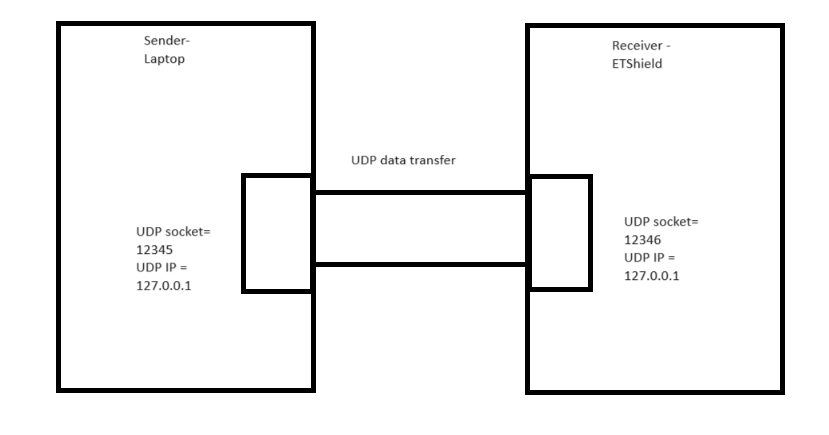

Let us now combine the two; the transfer of communication and displaying the movement of ET1 shield into the snippet

In [ ]:
import socket
from PIL import Image, ImageDraw
import ipywidgets as widgets
from IPython.display import display, clear_output
import math
import time

class Abstractcar:
    def __init__(self, x, y, image_width):
        self.image = image_width
        self.x = x
        self.y = y
        self.canvas_width = 900
        self.canvas_height = 500

    def draw_rectangle(self):
        canvas = Image.new("RGB", (self.canvas_width, self.canvas_height), "white")
        draw = ImageDraw.Draw(canvas)
        draw.rectangle([(self.x, self.y), (self.x + self.image, self.y + self.image)], fill="blue")        
        display(canvas)
        
    def move_right(self):
        move = 0
        while(move < 200):
            clear_output(wait=True)
            self.x += 0.8
            self.draw_rectangle()
            move+=1
            
    def move_left(self):
        move = 0
        while(move < 200):
            clear_output(wait=True)
            self.x -= 0.8
            self.draw_rectangle()
            move+=1
    
    def move_up(self):
        move = 0
        while(move < 200):
            clear_output(wait=True)
            self.y -= 0.8
            self.draw_rectangle()
            move+=1
        
    def move_down(self):
        move = 0
        while(move < 200):
            clear_output(wait=True)
            self.y += 0.8
            self.draw_rectangle()        
            move+=1
            
    def receiver(self):
        receiver_ip = "127.0.0.1"
        receiver_port = 12346

        sender_ip = "127.0.0.1"
        sender_port = 12345

        # Create a UDP socket
        receiver_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

        # Bind the socket to the receiver's address
        receiver_socket.bind((receiver_ip, receiver_port))

        while True:
            # Receive a message from the sender
            self.message, sender_address = receiver_socket.recvfrom(1024)
            print(f"Received message from sender: {self.message.decode()}")

            # Send a response back to the sender
            response_message = 'Received your message!'
            receiver_socket.sendto(response_message.encode(), sender_address)
            break;

car = Abstractcar(430, 230, 40)
car.draw_rectangle()



car.receiver()
full_message = car.message.decode()
elements = full_message.split(', ')
print(elements)

# Process each element
for element in elements:
    if element == "up":
        car.move_up()
        print("Move Up")
        print(elements)
    elif element == "down":
        car.move_down()
        print("Move Down")
        print(elements)
    elif element == "left":
        car.move_left()
        print("Move Left")
        print(elements)
    elif element == "right":
        car.move_right()
        print("Move Right")
        print(elements)
    else:
        print("Unknown command")